In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [6]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv") 
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Total No. Of Living Cases :-  203
Total No. Of Died Cases :-  96


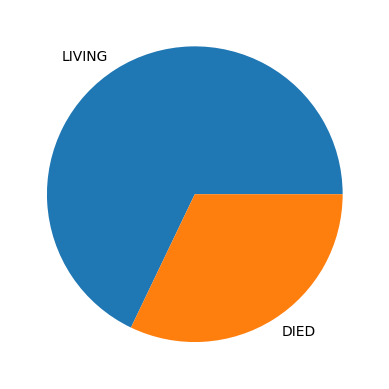

In [19]:
# seeing the distribution of classes, this will help us to identify which types 

len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING: ', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0,0.0] , shadow=False) 
plt.show() 

# inference :- we are actually working on imbalance data  
# imbalance:- your data is not equally distributed between classes 

<Axes: >

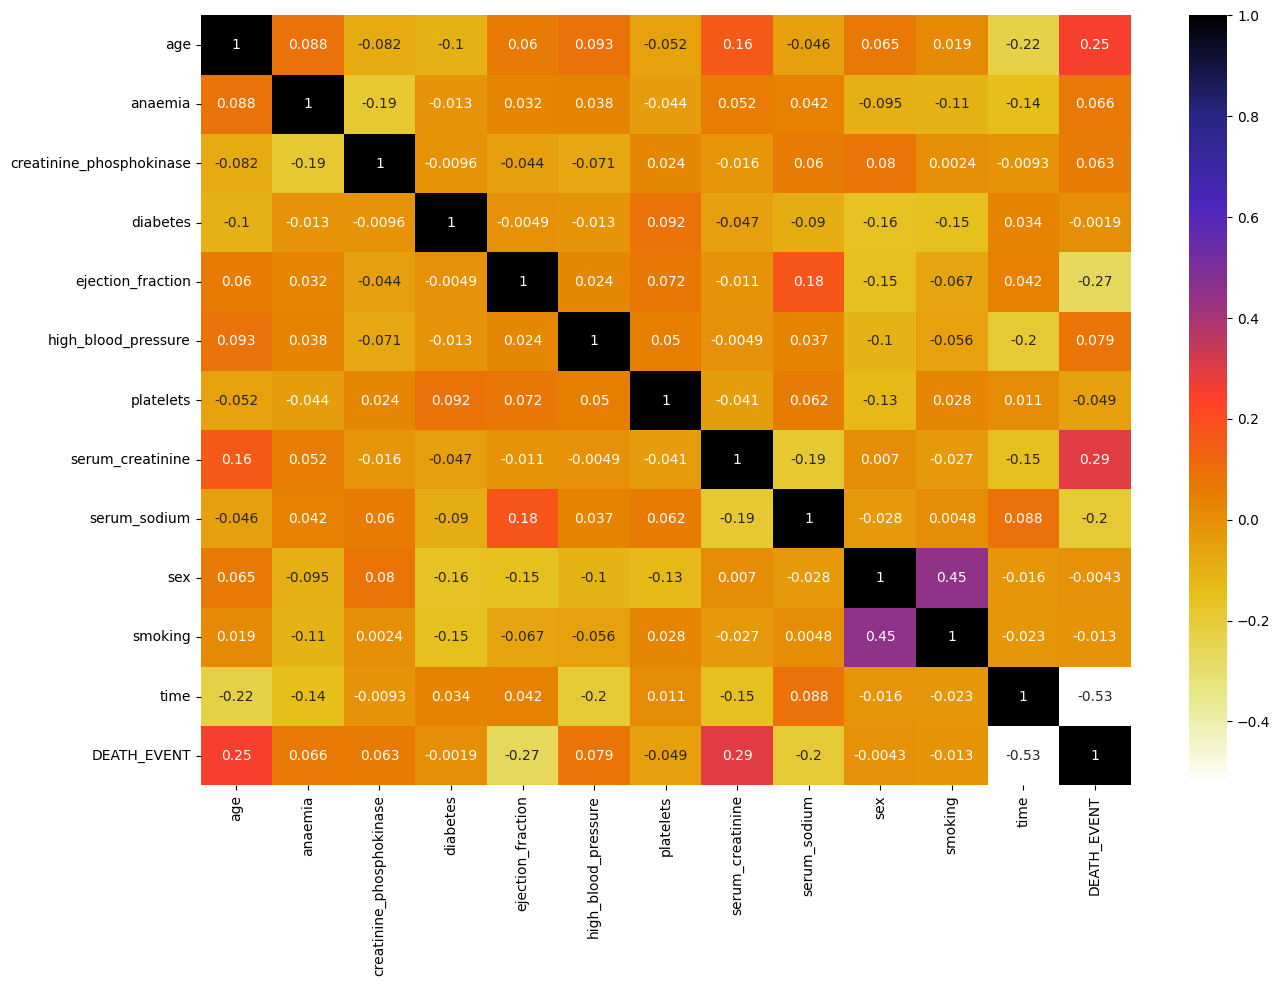

In [20]:
cor = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [58]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.head())

(239, 12) (239,) (60, 12) (60,)
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    75.000        1                       246         0                 15   
183  75.000        0                        99         0                 38   
185  60.667        1                       104         1                 30   
146  52.000        0                       132         0                 30   
30   94.000        0                       582         1                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
6                      0  127000.00              1.20           137    1   
183                    1  224000.00              2.50           134    1   
185                    0  389000.00              1.50           136    1   
146                    0  218000.00              0.70           136    1   
30                     1  263358.03              1.83           134    1   

     smoking  time  
6          0   

Epoch 1/50
15/15 [==============================] - 1s 1ms/step - loss: 2676.8901 - accuracy: 0.5690
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 975.9868 - accuracy: 0.5607
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 925.3624 - accuracy: 0.5397
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 631.1936 - accuracy: 0.5021
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 473.0683 - accuracy: 0.5314
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 486.1584 - accuracy: 0.5774
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 235.6043 - accuracy: 0.5900
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 398.7196 - accuracy: 0.5272
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 269.7260 - accuracy: 0.5356
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 189.9988 - accuracy: 0.573

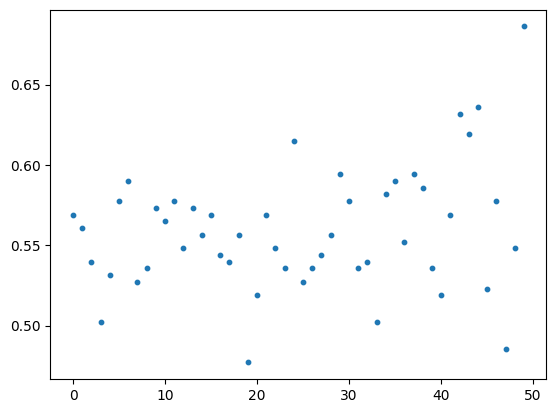

In [83]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=(X_train.shape[1]), use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(1, activation='sigmoid', use_bias=True))
number_of_epochs = 50

model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=16, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)

#print the accuracy on the testing data
print("Accuracy on test data is: ", model.evaluate(X_test, y_test)[1]*100, "%")

In [85]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 7.1 MB/s eta 0:00:00:00:01


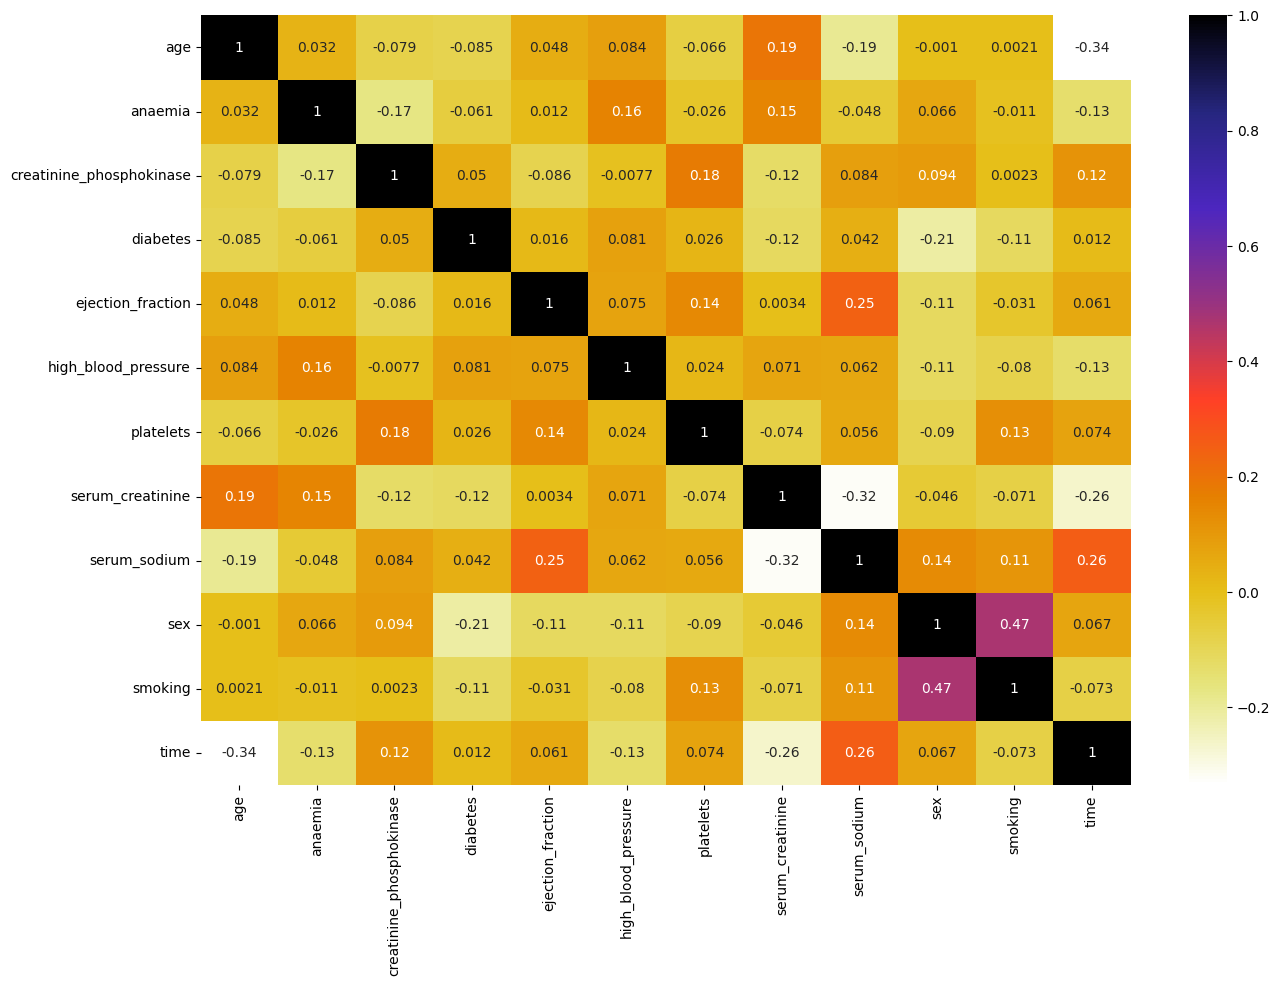

Epoch 1/50
9/9 [==============================] - 1s 3ms/step - loss: 6422.5566 - accuracy: 0.4820
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 1956.2399 - accuracy: 0.4964
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 1408.2469 - accuracy: 0.5180
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 1307.7990 - accuracy: 0.5036
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 1096.0752 - accuracy: 0.5180
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 811.6730 - accuracy: 0.5612
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 887.5401 - accuracy: 0.5108
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 649.5069 - accuracy: 0.4676
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 886.6747 - accuracy: 0.4317
Epoch 10/50
9/9 [==============================] - 0s 1ms/step - loss: 485.6531 - accuracy: 0.4388
Epoch 11/50
9/

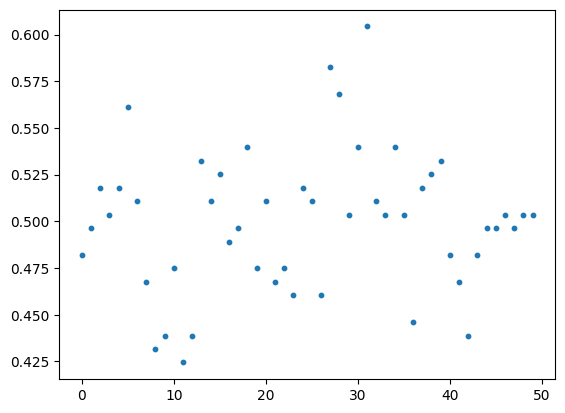

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

cor = X_smote.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=(X_train.shape[1]), use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(1, activation='sigmoid', use_bias=True))
number_of_epochs = 50

model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=16, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)

#print the accuracy on the testing data
print("Accuracy on test data is: ", model.evaluate(X_test, y_test)[1]*100, "%")

In [57]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))
    #what is precision score?
    #\ 

lr = LogisticRegression(max_iter=100) 
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)  
actual = y_test
lr.score(X_test, y_test)
evaluating_model(y_test, predictions)


Accuracy Score:-  0.8
Precision Score:-  0.8823529411764706
Recall Score:-  0.6
Confusion Matrix:- 
 [[33  2]
 [10 15]]
